In [1]:
import jax
import jax.numpy as jnp
import jax.random as jr

import hugegp as hug

import matplotlib.pyplot as plt

key = jr.key(321)

In [2]:
points = jnp.mgrid[-3:3:200j, -3:3:200j].reshape(2, -1).T
n_points = len(points)
covariance = hug.matern_cov_discretized(0.01, 20.0, 200)
graph = hug.build_lazy_graph(points, n_initial=100, k=8)

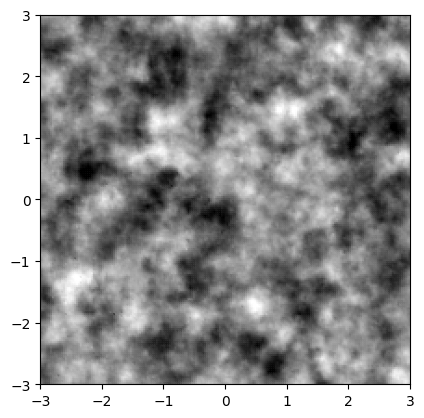

In [3]:
key, k1 = jr.split(key)
xi = jr.normal(k1, shape=(n_points,))
values = hug.generate(graph, covariance, xi, cuda=True)

plt.scatter(*points.T, c=values, s=1, cmap='gray', vmin=-3, vmax=3)
plt.gca().set(aspect='equal', xlim=(-3, 3), ylim=(-3, 3))
plt.show()

In [4]:
radius = jnp.logspace(-1, jnp.log10(3), 200)
ang = jnp.linspace(0, 2 * jnp.pi, 200)
radius, ang = jnp.meshgrid(radius, ang, indexing='ij')
points = jnp.stack([radius * jnp.cos(ang), radius * jnp.sin(ang)], axis=-1).reshape(-1, 2)
n_points = len(points)
covariance = hug.matern_cov_discretized(1e-8, 20.0, 200)
graph = hug.build_lazy_graph(points, n_initial=100, k=8, factor=1.2)

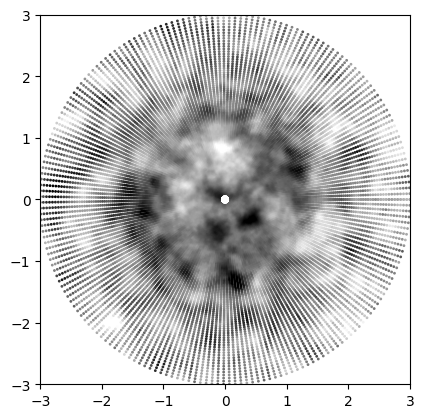

In [5]:
key, k1 = jr.split(key)
xi = jr.normal(k1, shape=(n_points,))

values = hug.generate(graph, covariance, xi, cuda=True)

plt.scatter(*points.T, c=values, s=1, cmap='gray', vmin=-3, vmax=3)
sz = 3
plt.gca().set(aspect='equal', xlim=(-sz, sz), ylim=(-sz, sz))
plt.show()

In [12]:
def log_spiral_points(noise, a=1, k=0.2, width=0.5, theta_max=10 * jnp.pi):
    theta = jnp.linspace(0, theta_max, len(noise))
    noise_theta = theta + width * noise
    r = a * jnp.exp(k * theta) / jnp.exp(k * theta_max)
    points = r * jnp.stack([jnp.cos(noise_theta), jnp.sin(noise_theta)])
    return points.T

In [13]:
n_points = 10_000
key, k1 = jax.random.split(key)
noise = jax.random.normal(k1, (n_points,))
points = log_spiral_points(noise)
covariance = hug.matern_cov_discretized(0.01, 20.0, 200, cutoff=0.05)
graph = hug.build_lazy_graph(points, n_initial=100, k=8, factor=1.2)

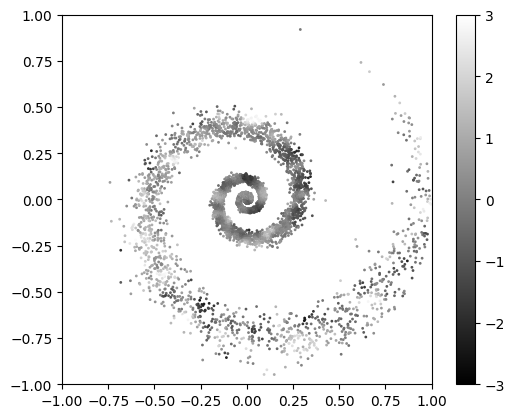

In [14]:
key, k1 = jr.split(key)
xi = jr.normal(k1, shape=(n_points,))
values = hug.generate(graph, covariance, xi, cuda=True)
values = values - values[0]

plt.scatter(*points.T, c=values, s=1, cmap='gray', vmin=-3, vmax=3)
plt.gca().set(aspect='equal', xlim=(-1, 1), ylim=(-1, 1))
plt.colorbar()
plt.show()